In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import cv2

import matplotlib.pyplot as plt
import numpy as np
import os

2024-09-22 12:48:44.919233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 12:48:45.069774: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-22 12:48:45.107447: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 12:48:47.357196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [41]:
os.system('nvidia-smi')

Sun Sep 22 13:05:08 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-PCIE-32GB           Off |   00000000:86:00.0 Off |                    0 |
| N/A   33C    P0             36W /  250W |   31468MiB /  32768MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

0

In [3]:
print(tf.sysconfig.get_build_info())

OrderedDict([('cpu_compiler', '/dt9/usr/bin/gcc'), ('cuda_compute_capabilities', ['sm_35', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'compute_80']), ('cuda_version', '11.2'), ('cudnn_version', '8'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', True)])


In [4]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=24096)]
#     )

In [5]:
img = cv2.imread("Data/tire_textures/testing_data/cracked/Cracked-208.jpg")
img.shape

(632, 632, 3)

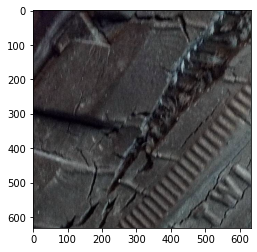

In [6]:
plt.imshow(img)

In [7]:
train_dir = "Data/tire_textures/training_data"
test_dir = "Data/tire_textures/testing_data"

In [8]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                        
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.5, 
                                                           horizontal_flip=True,
                                                            )

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                        
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.5, 
                                                           horizontal_flip=True,)

In [9]:
train_data = train_gen.flow_from_directory(train_dir,
                                            target_size = (224,224),
                                            class_mode = "categorical",
                                            batch_size = 32
                                            )
test_data = test_gen.flow_from_directory(test_dir,
                                          target_size = (224,224),
                                          class_mode = "categorical",
                                          batch_size = 32
                                          )

Found 703 images belonging to 2 classes.
Found 325 images belonging to 2 classes.


In [10]:
len(train_data)

22

In [11]:
len(test_data)

11

In [12]:
label_name = list(train_data.class_indices.keys())
label_name

['cracked', 'normal']

2024-09-22 12:48:53.842150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 12:48:53.937707: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31134 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:86:00.0, compute capability: 7.0


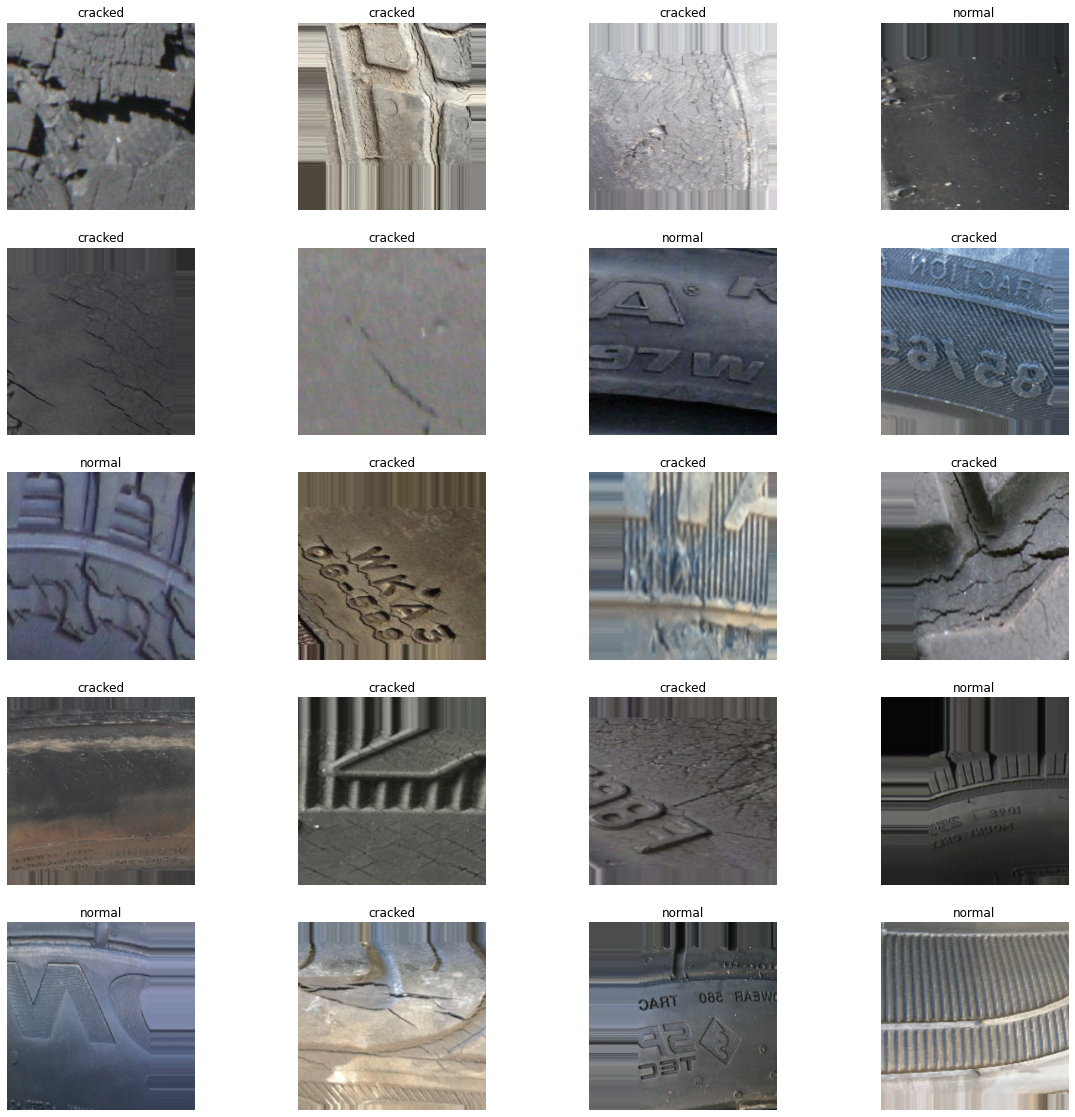

In [13]:
plt.figure(figsize=(20,20))

image, label = next(train_data)
num_images = image.shape[0]
tot_sample = 20

for i in range(tot_sample):
    plt.subplot(5, 4, i+1)
    plt.imshow(image[i])
    plt.title(label_name[tf.argmax(label[i])])
    plt.axis("off")

In [14]:
# import tensorflow as tf

# from tensorflow.keras import layers

# model = tf.keras.Sequential([
#          layers.Conv2D(filters= 13, kernel_size= 2, activation="relu", input_shape=(224,224,3)),                             
#          layers.Conv2D(filters= 13, kernel_size= 2, activation="relu"),
#          layers.Dropout(0.2),
#          layers.MaxPooling2D(pool_size= 2),

#          layers.Conv2D(filters= 13, kernel_size = 2, activation= "relu"),                             
#          layers.Conv2D(filters= 13, kernel_size= 2, activation= "relu"),  
#          layers.Dropout(0.2),
#          layers.MaxPooling2D(pool_size= 2),

#          layers.Conv2D(filters= 13, kernel_size = 2, activation= "relu"),                             
#          layers.Conv2D(filters= 13, kernel_size= 2, activation= "relu"),
#          layers.Dropout(0.2),
#          layers.MaxPooling2D(pool_size= 2),
#          layers.Flatten(),

#          layers.Dense(1024, activation= "relu"),
#          layers.Dropout(0.2),
#          layers.Dense(1024, activation = "relu"),
#          layers.Dropout(0.2),
#          layers.Dense(1024, activation= "relu"),

#          layers.Dense(2, activation="softmax")
                            
# ])
# model.summary()

In [15]:
# model.compile(
#     loss = tf.keras.losses.categorical_crossentropy,
#     optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
#     metrics = ["accuracy"]
# )
# model.fit(
#     train_data,
#     epochs = 10
# )

In [16]:
resnet_base = tf.keras.applications.ResNet50V2(include_top= False)
resnet_base.trainable = False

In [17]:
inputs = tf.keras.Input(shape=(224,224,3))
x = resnet_base(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(2, activation = "softmax")(x)
resnet_model = tf.keras.Model(inputs,outputs)

In [18]:
resnet_model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [25]:
history = resnet_model.fit(
    train_data,
    epochs = 15,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/15
22/22 [==============================] - 35s 2s/step - loss: 0.2805 - accuracy: 0.9004 - val_loss: 0.8131 - val_accuracy: 0.6769
Epoch 2/15
22/22 [==============================] - 32s 1s/step - loss: 0.2432 - accuracy: 0.9047 - val_loss: 0.7137 - val_accuracy: 0.6954
Epoch 3/15
22/22 [==============================] - 32s 1s/step - loss: 0.2227 - accuracy: 0.9218 - val_loss: 0.9080 - val_accuracy: 0.6831
Epoch 4/15
22/22 [==============================] - 32s 1s/step - loss: 0.2058 - accuracy: 0.9303 - val_loss: 0.6623 - val_accuracy: 0.7385
Epoch 5/15
22/22 [==============================] - 32s 1s/step - loss: 0.2067 - accuracy: 0.9189 - val_loss: 0.5801 - val_accuracy: 0.7477
Epoch 6/15
22/22 [==============================] - 32s 1s/step - loss: 0.1798 - accuracy: 0.9317 - val_loss: 0.6002 - val_accuracy: 0.7569
Epoch 7/15
22/22 [==============================] - 32s 1s/step - loss: 0.1757 - accuracy: 0.9360 - val_loss: 0.5270 - val_accuracy: 0.7908
Epoch 8/15
22/22 [==

In [31]:
resnet_model_training = resnet_model.evaluate(train_data)

22/22 [==============================] - 20s 916ms/step - loss: 0.1276 - accuracy: 0.9545


In [32]:
print(f"Resnet Model Accuracy: {resnet_model_training[1] * 100: 0.2f} %")

Resnet Model Accuracy:  95.45 %


In [33]:
resnet_model_evaluation = resnet_model.evaluate(test_data)

11/11 [==============================] - 13s 1s/step - loss: 0.7075 - accuracy: 0.7323


In [34]:
print(f"Resnet Model Accuracy: {resnet_model_evaluation[1] * 100: 0.2f} %")

Resnet Model Accuracy:  73.23 %


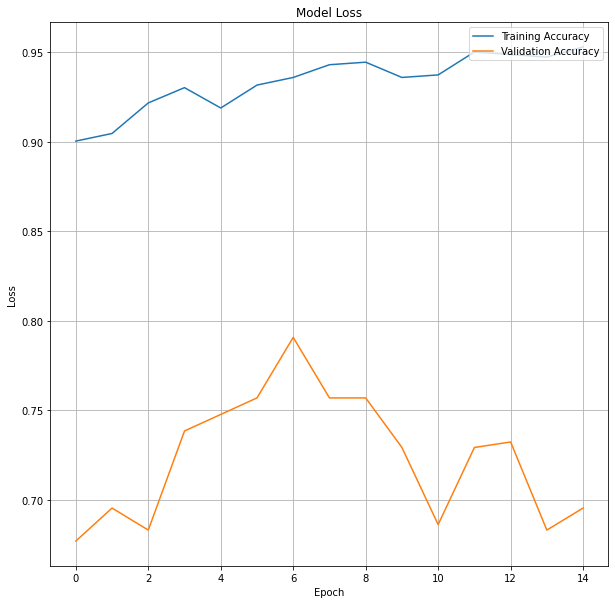

In [37]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [23]:
test_label = list(test_data.class_indices.keys())
test_label

['cracked', 'normal']

1/1 [==============================] - 0s 33ms/step


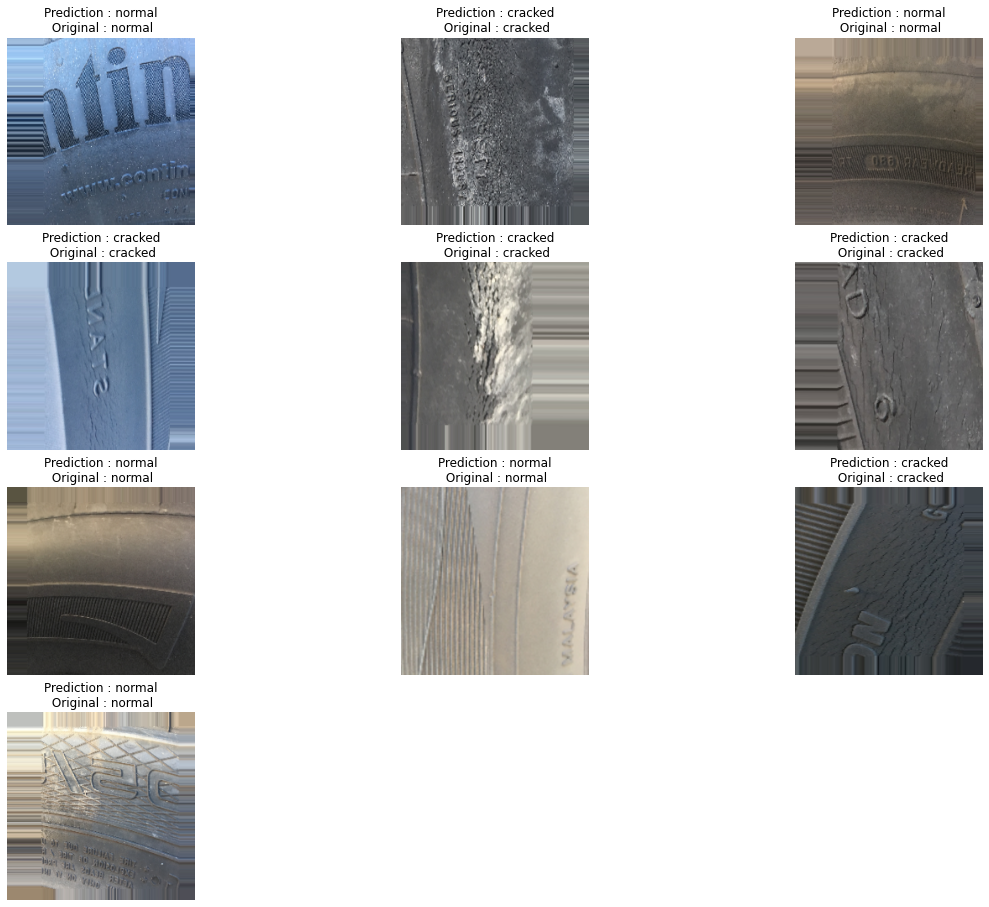

In [40]:
plt.figure(figsize=(20,20))
tot_sample = 10

for i in range(tot_sample):
    image,label = next(test_data)
    resnet_pred = resnet_model.predict(image)
    plt.subplot(5, 3, i+1)
    plt.imshow(image[i])
    plt.title(f"Prediction : {test_label[tf.argmax(resnet_pred[i])]}\n Original : {test_label[tf.argmax(label[i])]}")
    plt.axis("off")